<h1 style='color:blue', align='center'> Loan Approval Dataset </h1>

## Problem description
This dataset is the approval of loans for eligible candidates used to predict the load status.  

The primary objective of this mini project is to build a machine learning model that predicts whether the loan application  
were **Approved** or **Rejected** based on various details provided by the **Applicant**.  

Loan approval is an important process in banks and financial institutions, and using machine learning model helps in making  
faster and more accurate decisions.

## Problem Statement 
Banks receives thousands of loan application daily. Manually verifying each application is time-consuming and may lead to human errors.
This project aims to develop a predictive system that can automatically classify loan applications as Approved (Y) or Not Approved (N) using applicant information such as:
  1. Number of dependents
  2. Education
  3. Self employed
  4. Annual Income
  5. Loan Amount
  6. Loan term
  7. Cibil Score
  8. Residential Asset Value
  9. Commercial Asset Value
  10. Luxury Asset Value
  11. Bank Asset Value
  12. Loan status

## Import liabraries
Import numpy as np  
Import pandas as pd  
Import Matplotlib.pyplot as plt  
Import Seaborn as sns  
From sklearn.preprocessing import StandardScaler  
From sklearn.model_selection import train_test_split  
From sklearn.metrics import accuracy_score, confusion_matrix, classification_report  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading the Dataset
I took this **Loan approval** dataset from the website **Kaggle**.

In [2]:
import os
print(os.path.abspath("loan_approval_dataset.csv"))


C:\Users\ADMIN\Desktop\Jupyter folder\Projects\ML\loan_approval_dataset.csv


In [3]:
data = pd.read_csv(r"C:\Users\ADMIN\Desktop\Jupyter folder\Projects\ML\loan_approval_dataset.csv")
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## Observation
- The Above dataset is loaded successfully.

In [4]:
print("Rows and Columns of the Dataset : ",data.shape)

Rows and Columns of the Dataset :  (4269, 13)


In [5]:
data.columns = data.columns.str.strip()
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [6]:
# Print first 5 rows of the Datasets.
print("First 5 row of the Datasets :\n")
data.head(5)

First 5 row of the Datasets :



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Observation
- It shows the First 5 rows of the Dataset.

## Data Preprocessing

## Checking of Missing values

In [7]:
print("Number of missing values in the dataset :\n",data.isnull().sum())

Number of missing values in the dataset :
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


## Observation
- There is no missing values in the above dataset.

## Info of the dataset

In [8]:
print("Info of the dataset :\n",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
Info of the dataset :
 None


## Observation
- The Info of dataset is loaded successfully.

## Summary of the Dataset

In [9]:
print("The summarization of the dataset :\n")
data.describe()

The summarization of the dataset :



,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Observation
- The **Summarization** of the dataset is loaded successfully.

In [10]:
print("Number of status in Loan status :\n",data['loan_status'].value_counts())

Number of status in Loan status :
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


## Observation
- In **Application of the Loan**, there *2656* application were **Approved**.
- *1613* are **Not Approved**.

## Label Encoder

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data['loan_status'])
data['self_employed'] = le.fit_transform(data['self_employed'])
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,Not Graduate,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,Graduate,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,Graduate,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,Not Graduate,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,Not Graduate,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,Not Graduate,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,Not Graduate,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


## Observation
- Here the loan_status in the object datatype. So, I converted the loan_status **Object into Numerical value** by using **LabelEncoding**.

## Convert the Assets value into one column.
Residential_asset_value, Commercial_asset_value, Luxury_asset_value, Bank_asset_value.

In [12]:
data['Total_asset_value'] = data['residential_assets_value']+data['commercial_assets_value']+data['luxury_assets_value']+data['bank_asset_value']
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Total_asset_value
0,1,2,Graduate,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,50700000
1,2,0,Not Graduate,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,17000000
2,3,3,Graduate,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,57700000
3,4,3,Graduate,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,52700000
4,5,5,Not Graduate,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1,7400000
4265,4266,0,Not Graduate,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,20000000
4266,4267,2,Not Graduate,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,39000000
4267,4268,1,Not Graduate,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,28800000


## Observation
- Converting the columns into one column is successfully loaded.

## Drop the Columns

In [13]:
data = data.drop(columns=['loan_id','no_of_dependents','education','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'],axis=1)
data

,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Total_asset_value
0,0,9600000,29900000,12,778,0,50700000
1,1,4100000,12200000,8,417,1,17000000
2,0,9100000,29700000,20,506,1,57700000
3,0,8200000,30700000,8,467,1,52700000
4,1,9800000,24200000,20,382,1,55000000
...,...,...,...,...,...,...,...
4264,1,1000000,2300000,12,317,1,7400000
4265,1,3300000,11300000,20,559,0,20000000
4266,0,6500000,23900000,18,457,1,39000000
4267,0,4100000,12800000,8,780,0,28800000


## Seperate Features and Target

In [14]:
X = data.drop(columns='loan_status',axis=1)
y = data['loan_status']
X

,self_employed,income_annum,loan_amount,loan_term,cibil_score,Total_asset_value
0,0,9600000,29900000,12,778,50700000
1,1,4100000,12200000,8,417,17000000
2,0,9100000,29700000,20,506,57700000
3,0,8200000,30700000,8,467,52700000
4,1,9800000,24200000,20,382,55000000
...,...,...,...,...,...,...
4264,1,1000000,2300000,12,317,7400000
4265,1,3300000,11300000,20,559,20000000
4266,0,6500000,23900000,18,457,39000000
4267,0,4100000,12800000,8,780,28800000


In [15]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int64

## Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split into Train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

## Observation
- The Above cells shows that the **Training** and **Testing** data are successfully splitted.

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Observation
- The model **Logistic Regression** is successfully loaded.

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Observation
- The model **Random Forest** is successfully loaded.

## SVM (Support Vector Machine Classifier)

In [20]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Observation
- The model **SVM(Support Vector Machine)** is successfully loaded.

## Make prediction

In [21]:
# Logistic Regression
y_pred_1 = model.predict(X_test)

# Random Forest
y_pred_2 = rf_model.predict(X_test)

# SVM
y_pred_3 = svm_model.predict(X_test)


In [22]:
# SVM 
print("Training Accuracy : ",svm_model.score(X_train, y_train))
print("Testing Accuracy : ",svm_model.score(X_test,y_test))

Training Accuracy :  0.9619326500732065
Testing Accuracy :  0.9402810304449649


## Evaluation
- For Evaluation using **Accuracy score, Confusion matrix, Classification report**.
- The Evaluation under **Logistic Regression, Random Forest Classifier, SVM**.

## Evaluation for Logistic Regression.

In [23]:
# Evaluation for Logistic Regression
print("Accuracy Score in Logistic Regression : ",accuracy_score(y_test,y_pred_1))
print("\n")
print("Confusion Matrix in Logistic Regression :\n",confusion_matrix(y_test,y_pred_1))
print("\n")
print("Classification Report in Logistic Regression :\n",classification_report(y_test,y_pred_1))

Accuracy Score in Logistic Regression :  0.9039812646370023


Confusion Matrix in Logistic Regression :
 [[499  37]
 [ 45 273]]


Classification Report in Logistic Regression :
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.90       854
   macro avg       0.90      0.89      0.90       854
weighted avg       0.90      0.90      0.90       854



## Observation
The **Evaluation** made to used under Logistic Regression:
- Here the Class 0 is the **Loan Approved for the Applicant**.
- The Class 1 is the **Loan Rejected for the Applicant**.

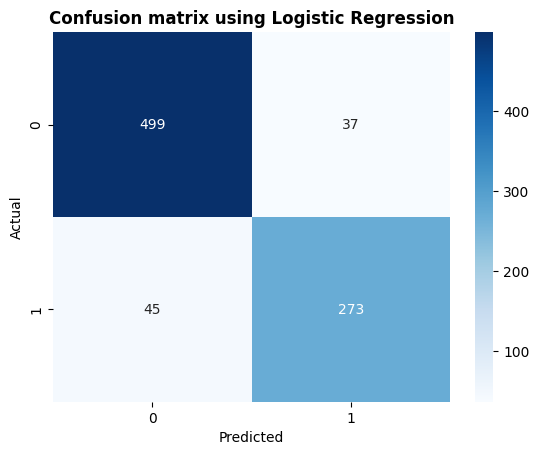

In [24]:
# Data Visualization
lrcm = confusion_matrix(y_test,y_pred_1)
sns.heatmap(data=lrcm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion matrix using Logistic Regression',fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1. **Accuracy**: 0.9039 (≈ 90%)

This means the model correctly predicted whether the **Loan Approved or Rejected** of the test cases.

2. **Confusion Matrix:**


Term	Meaning	Count

True Positive (TP)	Correctly predicted  499 people loan were Approved

True Negative (TN)	Correctly predicted  273 people loan were Rejected

False Positive (FP)	Mistakenly predicted 37  Predicted people loan were Approved but actually Rejected

False Negative (FN)	Mistakenly predicted 45 Predicted people loan were Rejected but actually Approved

3. **Precision**:

Class 0(Approved) : 92%

Class 1(Rejected) : 88%

Precision tells us when the model predicts a class, how often it's right.

4. **Recall**:
Class 0: 93%

Class 1: 86%

Recall tells us how well the model finds all positive cases.

5. ** F1-Score**:

Class 0: 0.92

Class 1: 0.87

## Evaluation for Random Forest Classifier.

In [25]:
# Evaluation for Random Forest Classifier
print("Accuracy Score in Random Forest : ",accuracy_score(y_test,y_pred_2))
print("\n")
print("Confusion Matrix in Random Forest:\n",confusion_matrix(y_test,y_pred_2))
print("\n")
print("Classification Report in Random Forest:\n",classification_report(y_test,y_pred_2))

Accuracy Score in Random Forest :  0.9789227166276346


Confusion Matrix in Random Forest:
 [[530   6]
 [ 12 306]]


Classification Report in Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



## Observation
The **Evaluation** made to used under Random Forest:
- Here the Class 0 is the **Loan Approved for the Applicant**.
- The Class 1 is the **Loan Rejected for the Applicant**.

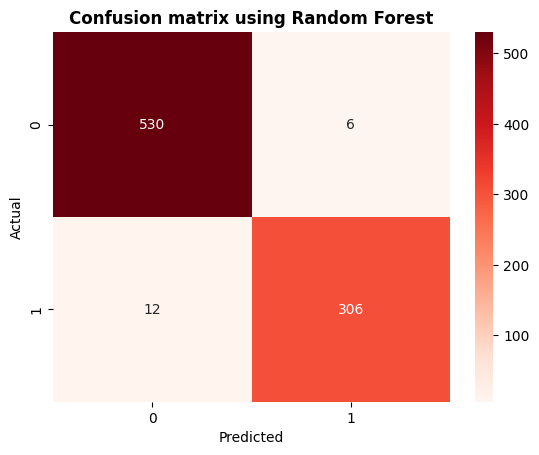

In [26]:
# Data Visualization
rfcm = confusion_matrix(y_test,y_pred_2)
sns.heatmap(data=rfcm, annot=True, fmt='d', cmap='Reds', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion matrix using Random Forest',fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1. **Accuracy**: 0.9789 (98%)

This means the model correctly predicted whether the **Loan Approved or Rejected** of the test cases.

2. **Confusion Matrix:**


Term	Meaning	Count

True Positive (TP)	Correctly predicted  530 people loan were Approved

True Negative (TN)	Correctly predicted  306 people loan were rejected 

False Positive (FP)	Mistakenly predicted 6 Predicted people loan were Approved but actually Rejected

False Negative (FN)	Mistakenly predicted 12 Predicted people loan were Rejected but actually Approved


3. **Precision**:

Class 0(Approved) : 98%

Class 1(Rejected) : 98%

Precision tells us when the model predicts a class, how often it's right.

4. **Recall**:

Class 0: 99 %

Class 1: 96 %

Recall tells us how well the model finds all positive cases.

5. ** F1-Score**:

Class 0: 0.98

Class 1: 0.97

## Evaluation for SVM(Support Vector Machine)

In [27]:
# Evaluation for SVM
print("Accuracy Score in SVM : ",accuracy_score(y_test,y_pred_3))
print("\n")
print("Confusion Matrix in SVM :\n",confusion_matrix(y_test,y_pred_3))
print("\n")
print("Classification Report in SVM :\n",classification_report(y_test,y_pred_3))

Accuracy Score in SVM :  0.9402810304449649


Confusion Matrix in SVM :
 [[508  28]
 [ 23 295]]


Classification Report in SVM :
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       536
           1       0.91      0.93      0.92       318

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854



## Observation
The **Evaluation** made to used under SVM:
- Here the Class 0 is the **Loan Approved for the Applicant**.
- The Class 1 is the **Loan Rejected for the Applicant**.

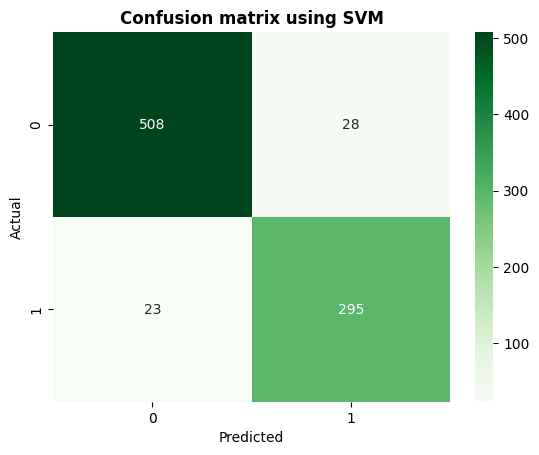

In [28]:
# Data Visualization
svm_cm = confusion_matrix(y_test,y_pred_3)
sns.heatmap(data=svm_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion matrix using SVM',fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1. **Accuracy**: 0.9402 (≈ 94%)

This means the model correctly predicted whether the **Loan Approved or Rejected** of the test cases.

2. **Confusion Matrix:**


Term	Meaning	Count

True Positive (TP)	Correctly predicted  508 people loan were Approved

True Negative (TN)	Correctly predicted  295 people loan were rejected 

False Positive (FP)	Mistakenly predicted 28  Predicted people loan were Approved but actually Rejected

False Negative (FN)	Mistakenly predicted 23  Predicted people loan were Rejected but actually Approved


3. **Precision**:

Class 0(Approved) : 96%

Class 1(Rejected) : 91 %

Precision tells us when the model predicts a class, how often it's right.

4. **Recall**:

Class 0: 95 %

Class 1: 93 %

Recall tells us how well the model finds all positive cases.

5. ** F1-Score**:

Class 0: 0.95

Class 1: 0.92

## Comparing the Each Algorithms by using Data Visualization

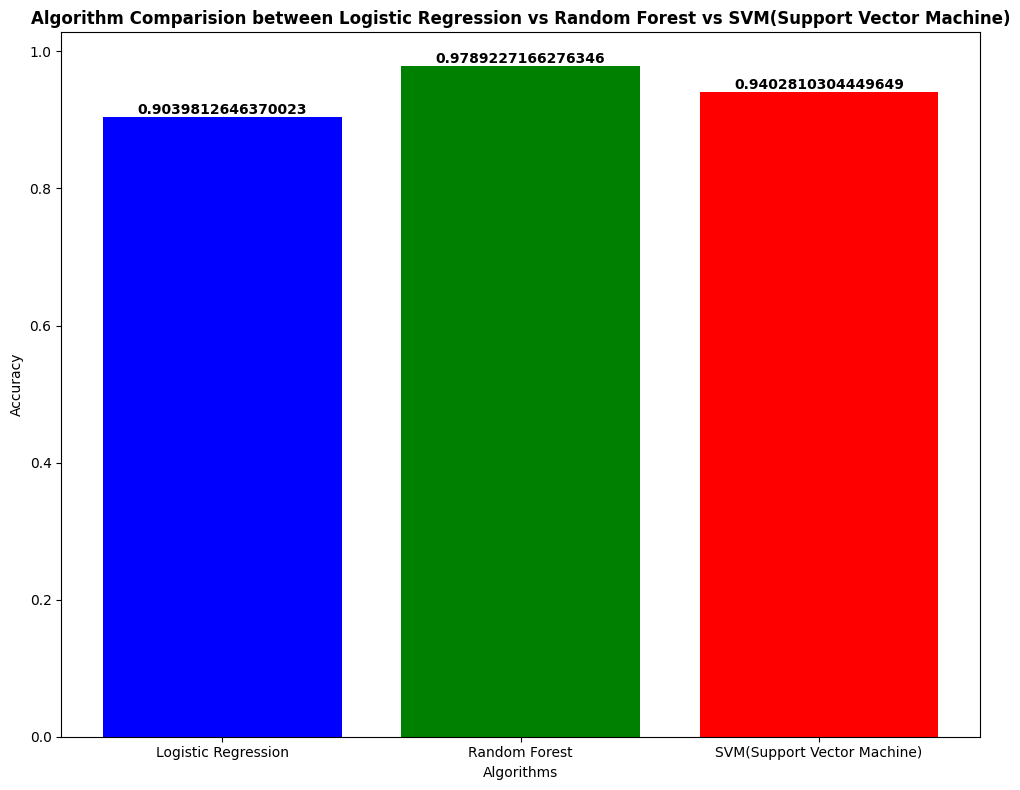

In [29]:
# Comparision between Logistic Regression and Random Forest.
plt.figure(figsize=(10,8))
algorithms = ['Logistic Regression','Random Forest','SVM(Support Vector Machine)']
accuracy = [accuracy_score(y_test,y_pred_1),accuracy_score(y_test, y_pred_2),accuracy_score(y_test,y_pred_3)]
colors = ['blue','green','red']
bars=plt.bar(algorithms,accuracy, color=colors)
for bar in bars:
    yv = bar.get_height()
    plt.text(
        bar.get_x()+bar.get_width()/2,
        yv + 0.0,
        yv,ha='center', va='bottom',fontweight='bold'
    )
plt.title('Algorithm Comparision between Logistic Regression vs Random Forest vs SVM(Support Vector Machine)',fontweight='bold')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

## Observation
1. **Accuracy Score** for the **Logistic Regression** is 0.9039(90%).
2. **Accuracy Score** for the **Random Forest** is 0.9789(98%).
3. **Accuracy Score** for the **SVM(Support Vector Machine)** is 0.9402(94%).

## Final Conclusion
**Result** 
According to the above prediction and Evaluation, Comparision between the Logistic Regression, Random Forest and SVM(Support Vector Machine):
-  **Random Forest** get succeed and it is the best fit  for Streamlit.

## Prediction for one row

In [33]:
predictions = model.predict(X_test)
for i, pred in enumerate(predictions):
    print(f'Row {i}, Prediction : ','Approved'if pred == 1 else 'Rejected')

Row 0, Prediction :  Approved
Row 1, Prediction :  Rejected
Row 2, Prediction :  Approved
Row 3, Prediction :  Rejected
Row 4, Prediction :  Rejected
Row 5, Prediction :  Rejected
Row 6, Prediction :  Rejected
Row 7, Prediction :  Approved
Row 8, Prediction :  Rejected
Row 9, Prediction :  Approved
Row 10, Prediction :  Rejected
Row 11, Prediction :  Rejected
Row 12, Prediction :  Rejected
Row 13, Prediction :  Approved
Row 14, Prediction :  Approved
Row 15, Prediction :  Rejected
Row 16, Prediction :  Rejected
Row 17, Prediction :  Rejected
Row 18, Prediction :  Approved
Row 19, Prediction :  Approved
Row 20, Prediction :  Rejected
Row 21, Prediction :  Approved
Row 22, Prediction :  Approved
Row 23, Prediction :  Approved
Row 24, Prediction :  Rejected
Row 25, Prediction :  Rejected
Row 26, Prediction :  Rejected
Row 27, Prediction :  Rejected
Row 28, Prediction :  Rejected
Row 29, Prediction :  Approved
Row 30, Prediction :  Rejected
Row 31, Prediction :  Approved
Row 32, Prediction

In [35]:
row = X_test[5]
prediction = model.predict([row])
print(f'Row {row} prediction : ','Approved' if prediction == 1 else 'Rejected')

Row [ 0.99276452 -0.12796098 -0.29123667 -0.50809068  0.45278033 -0.09478793] prediction :  Rejected


## Observation
Here I took the **4** rows for the prediction here the **Status** is **Approved** the Loan.

In [32]:
import joblib
joblib.dump(rf_model,"rf_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']